In [28]:
import sys
sys.path.append('../')

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import numpy as np

In [30]:
from src.models.calculate_metrics import calculate_total_return,calculate_drawdown
from src.visualization.visualize import gerar_grafico_retorno_total_portfolios

In [31]:
path2 = "../data/processed/04_daily_returns_indices.csv"
path_p1 = "../data/processed/05_daily_returns_port1.csv"
path_p2 = "../data/processed/06_daily_returns_port4.csv"
path_p3 = "../data/processed/07_daily_returns_port8.csv"

In [32]:
path_i1 = "../data/processed/03_daily_returns_imab5.csv"
path_i2 = "../data/processed/01_daily_returns_imab.csv"
path_i3 = "../data/processed/02_daily_returns_ihfa.csv"

In [33]:
df = pd.read_csv(path2).loc[:,['data',"IBOV"]]
df = df[["IBOV","data"]]
df1 = pd.read_csv(path_p1)
df2 = pd.read_csv(path_p2)
df3 = pd.read_csv(path_p3)


In [34]:
def retirar_outlier(df):
  
  df = df.loc[df.iloc[:,1]<=100]
  
  return df

In [35]:
def deixar_pronto(df,tipo):
  
  df_teste = pd.DataFrame(df["data"])
  if tipo == "tipo1":
    df_teste["acumulado"] = calculate_total_return(df.iloc[:,0])
    picos,drawdown = calculate_drawdown(df.iloc[:,0])
  elif tipo == "tipo2":
    df_teste["acumulado"] =calculate_total_return(df.iloc[:,0]/100)
    picos,drawdown = calculate_drawdown(df.iloc[:,0]/100)
  elif tipo == "tipo3":
    df_teste["acumulado"] =calculate_total_return(df.iloc[:,1])
    picos,drawdown = calculate_drawdown(df.iloc[:,1])
  df_teste["picos"] = picos
  df_teste["drawdown"]=drawdown
  
  return df_teste

In [36]:
df4 = pd.read_csv(path2).loc[:,['data',"CDI"]]
df4 = df4[["CDI","data"]]

df5 = retirar_outlier(pd.read_csv(path_i1))
df5 = df5[df5["data"]>"2010-12-30"]
df6 = retirar_outlier(pd.read_csv(path_i2))
df6 = df6[df6["data"]>"2010-12-30"]
df7 = retirar_outlier(pd.read_csv(path_i3))
df7 = df7[df7["data"]>"2010-12-30"]

In [37]:
df_teste = deixar_pronto(df,"tipo1")
df_teste2 = deixar_pronto(df1,"tipo2")
df_teste3 = deixar_pronto(df2,"tipo2")
df_teste4 = deixar_pronto(df3,"tipo2")

In [38]:
df_teste5 = deixar_pronto(df4,"tipo1")
df_teste6 = deixar_pronto(df5,"tipo3")
df_teste7 = deixar_pronto(df6,"tipo3")
df_teste8 = deixar_pronto(df7,"tipo3")

In [39]:
dataframes  = [df_teste,df_teste2,df_teste3,df_teste4]
dataframes2 = [df_teste5,df_teste6,df_teste7,df_teste8]
benchmarks  = ["IBOV","PORT1","PORT4","PORT8"]
benchmarks2 = ["CDI","IMAB5","IMAB","IHFA"]

In [40]:
path_load = "../reports/figures/"

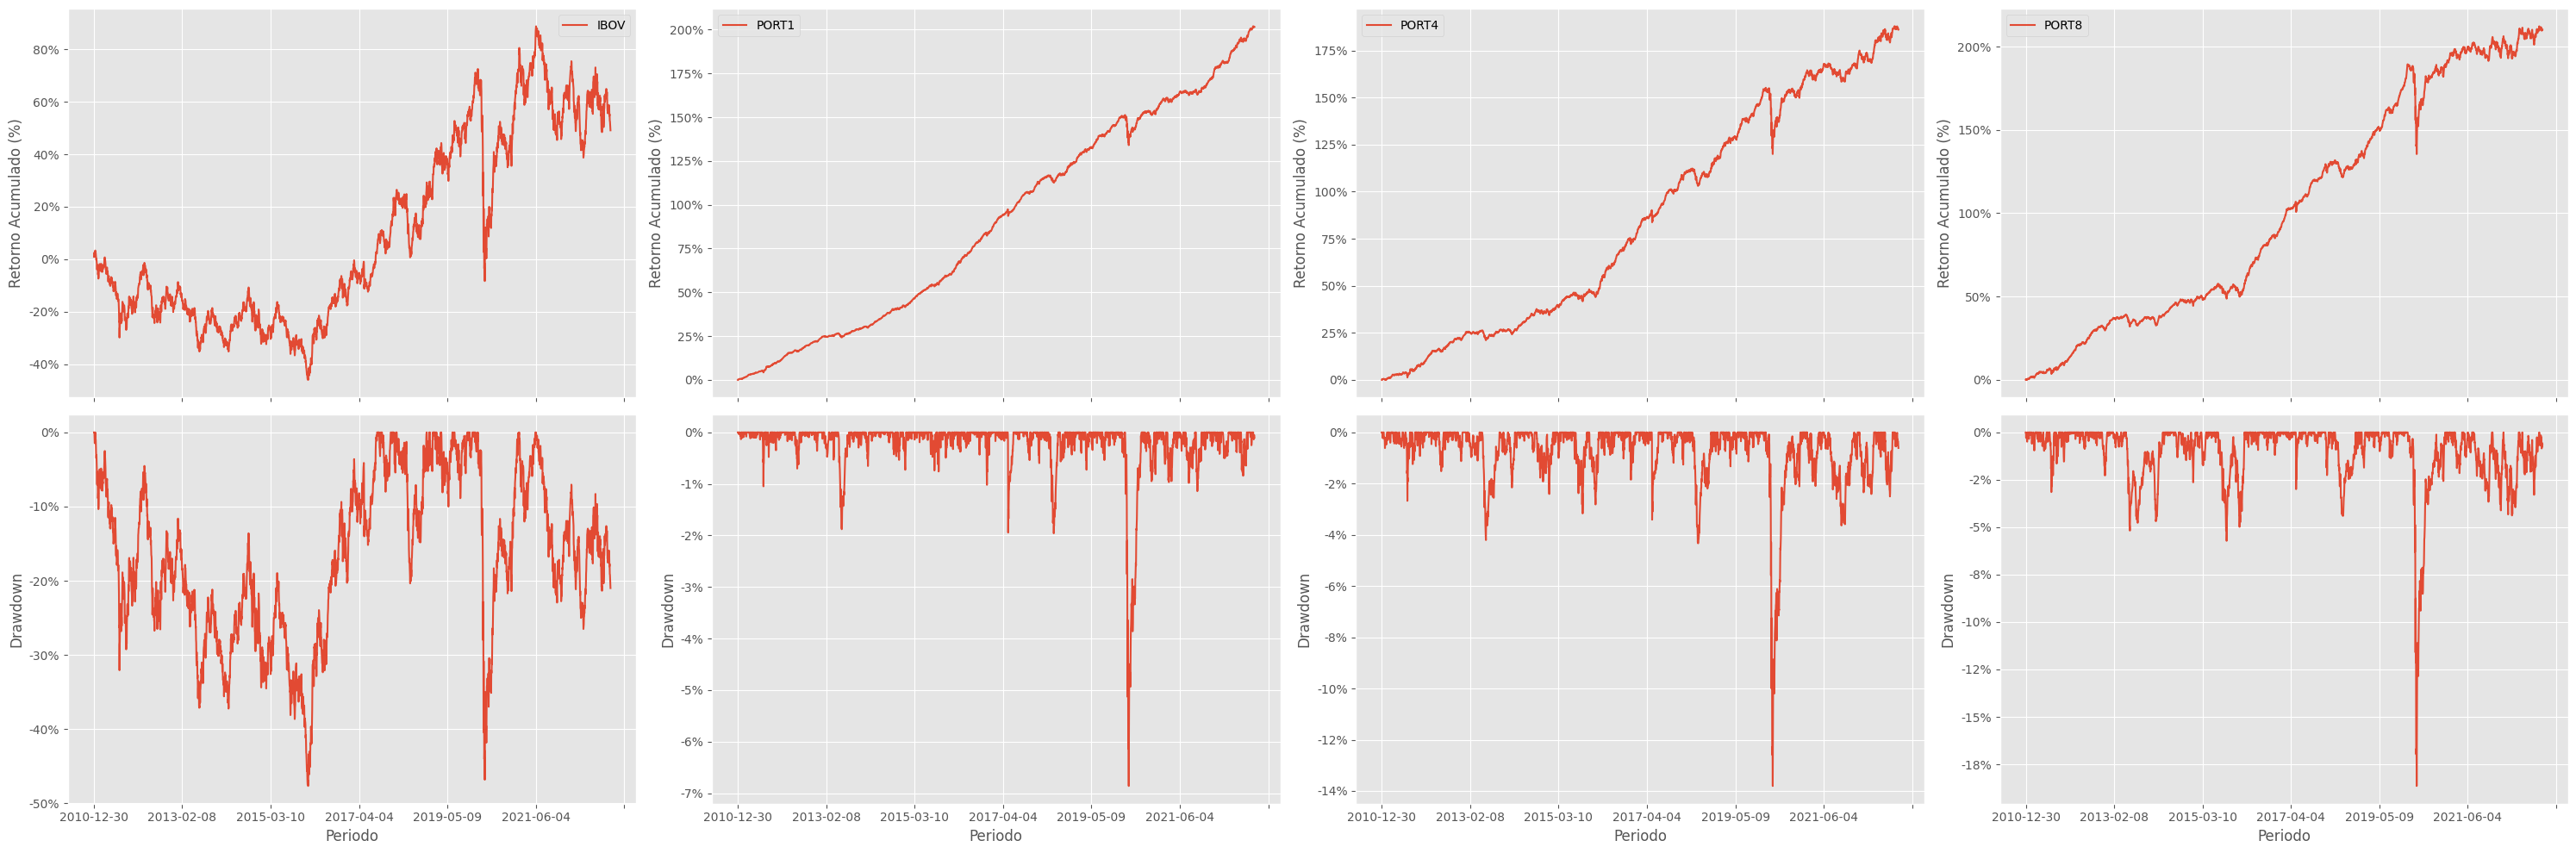

In [41]:
fig1 = gerar_grafico_retorno_total_portfolios(dataframes,benchmarks,path_load,"retorno_total_portfolios1.png")


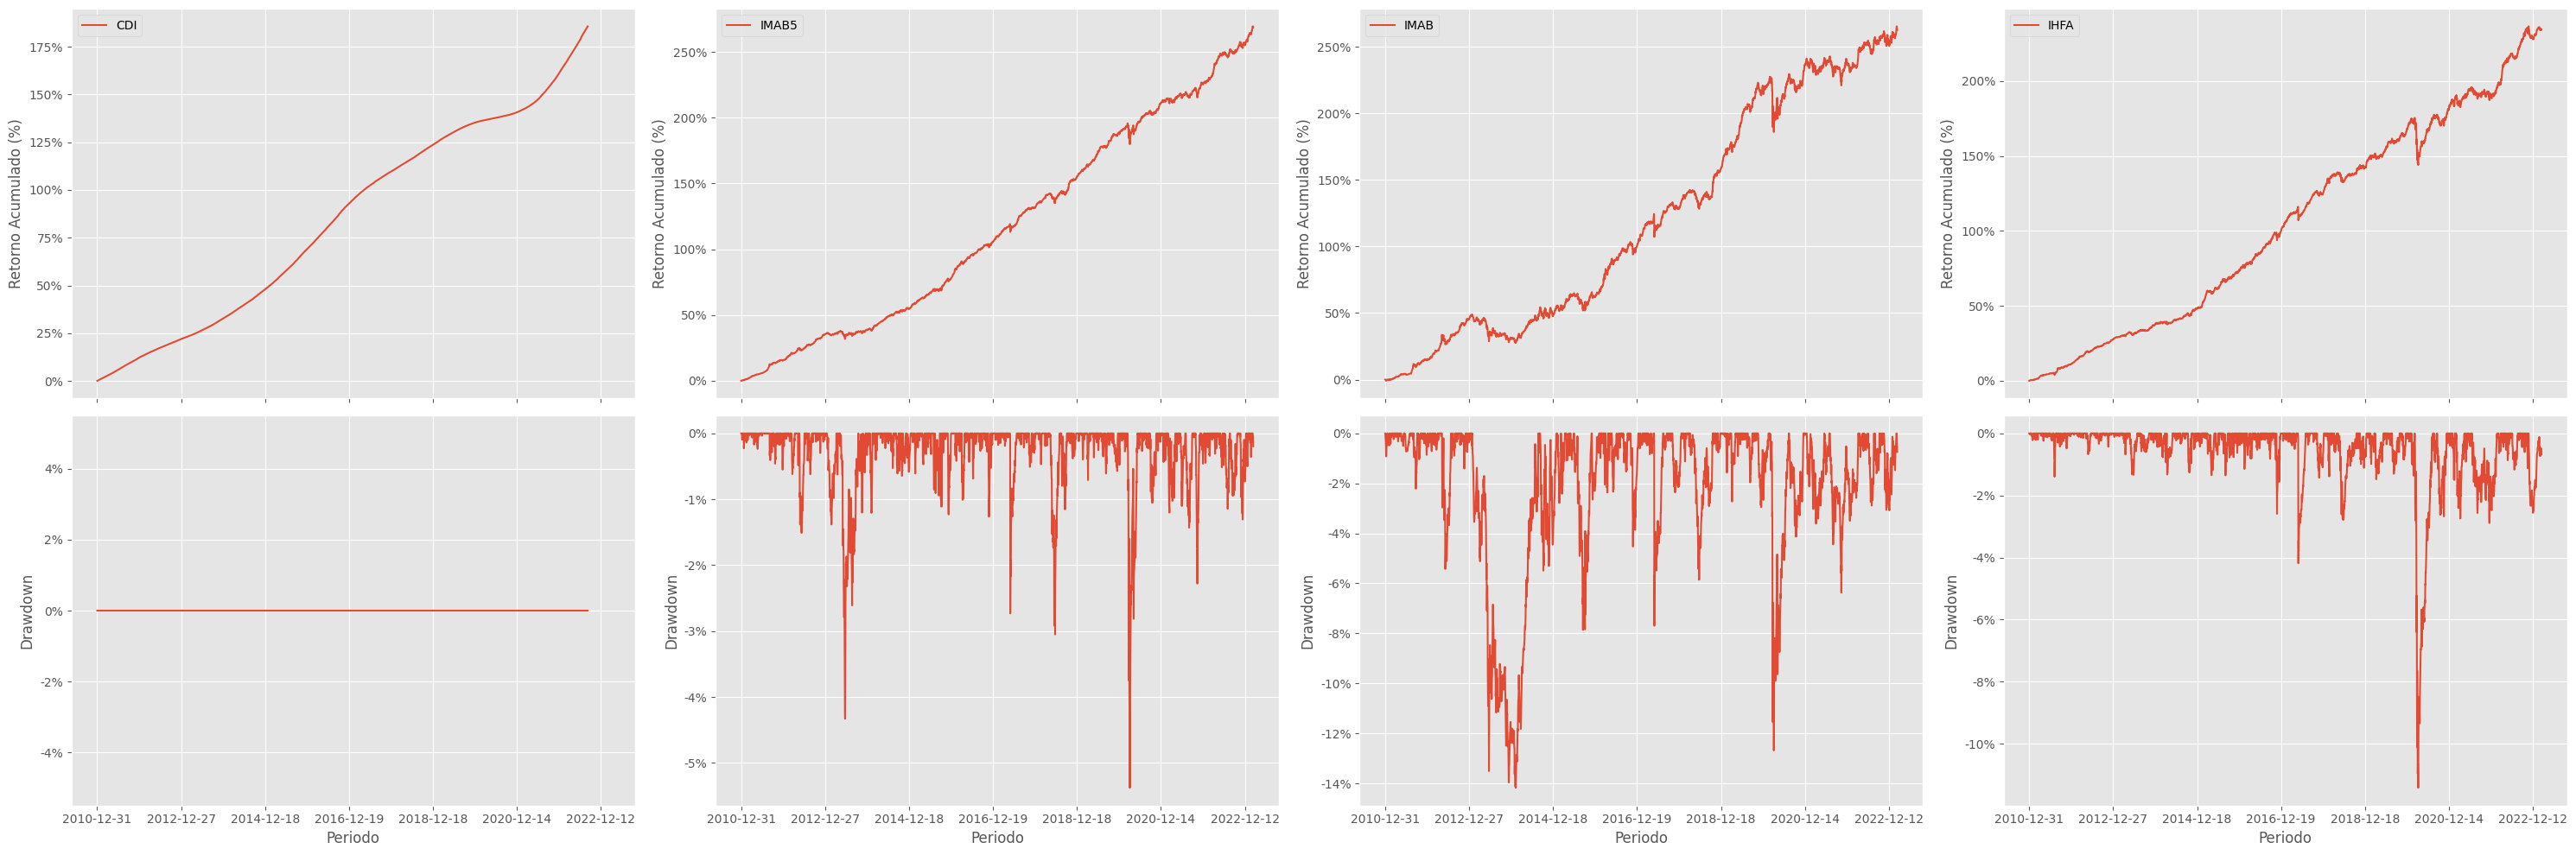

In [42]:
fig2 = gerar_grafico_retorno_total_portfolios(dataframes2,benchmarks2,path_load,"retorno_total_portfolios2.png")